In [11]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df_GR = df[df["job_country"] == "Greece"]

In [13]:
df_skills = df_GR.explode("job_skills")

df_skills[["job_title", "job_skills"]]

,job_title,job_skills
1003,Data Quality Analyst – Greece,sql
1050,"Sr. Manager, Regulatory Quality Assurance Data...",oracle
1050,"Sr. Manager, Regulatory Quality Assurance Data...",sharepoint
1235,Data Analyst,sql
1235,Data Analyst,python
...,...,...
783226,Senior Software Engineer - Query Languages,postgresql
783226,Senior Software Engineer - Query Languages,cassandra
783226,Senior Software Engineer - Query Languages,github
783226,Senior Software Engineer - Query Languages,zoom


In [14]:
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()

df_skills_count = df_skills_count.reset_index(name="skill_count")

df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
704,sql,Data Engineer,316
549,python,Data Engineer,290
703,sql,Data Analyst,247
550,python,Data Scientist,233
175,excel,Data Analyst,193
...,...,...,...
798,unix,Data Scientist,1
25,ansible,Senior Data Engineer,1
21,angular.js,Software Engineer,1
838,yarn,Software Engineer,1


In [17]:
job_titles = df_skills_count["job_title_short"].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

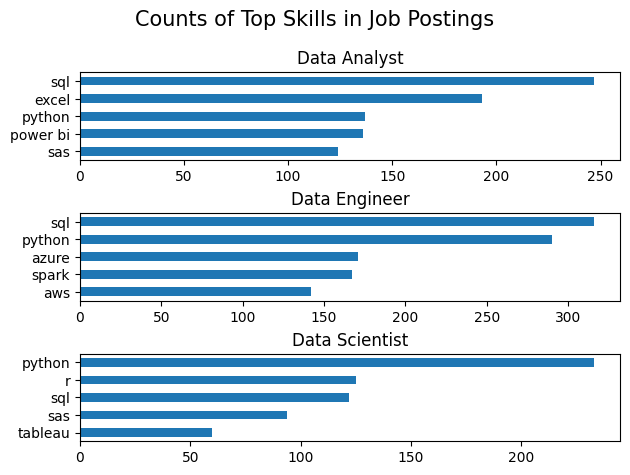

In [22]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5) #fix the overlap
plt.show()

In [24]:
df_job_title_count = df_GR["job_title_short"].value_counts().reset_index(name="job_total")

In [27]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how="left", on="job_title_short")

df_skills_perc["skill_percent"] = 100  * df_skills_perc["skill_count"] / df_skills_perc["job_total"]

df_skills_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,sql,Data Engineer,316,443,71.331828
1,python,Data Engineer,290,443,65.462754
2,sql,Data Analyst,247,496,49.798387
3,python,Data Scientist,233,317,73.501577
4,excel,Data Analyst,193,496,38.911290
...,...,...,...,...,...
835,unix,Data Scientist,1,317,0.315457
836,ansible,Senior Data Engineer,1,122,0.819672
837,angular.js,Software Engineer,1,195,0.512821
838,yarn,Software Engineer,1,195,0.512821


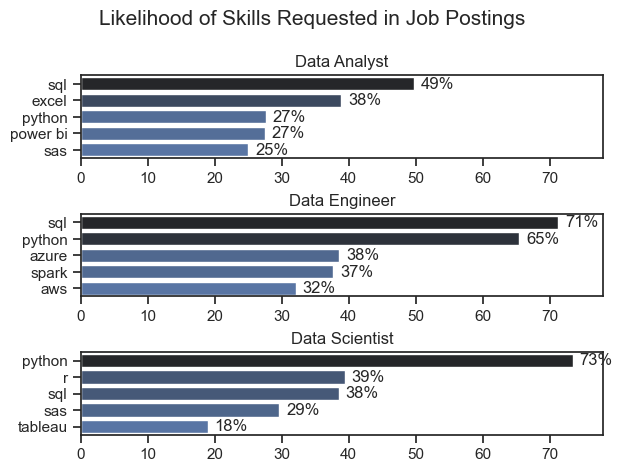

In [47]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    sns.barplot(data=df_plot, x="skill_percent", y="job_skills", ax=ax[i], hue="skill_count", palette="dark:b_r")
    ax[i].set_title(job_title)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)

    for n, v in enumerate(df_plot["skill_percent"]):
        ax[i].text(v + 1, n, f"{int(v)}%", va="center")
    

fig.suptitle("Likelihood of Skills Requested in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5) #fix the overlap
plt.show()